**Implementing Ant Colony Optimization algorithm with Meeting Strategy and Hybrid Particle Swarm Optimization algorithm with Local Search(2-opt) for the Traveling Salesman Problem**

**Importing libraries**

In [13]:
#Cell 1
import numpy as np
import pandas as pd
import math
import operator
import random
import matplotlib.pyplot as plt
import warnings

**Creating a class for City**

In [14]:
#Cell 2
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance_to(self, other):
        return np.sqrt((self.x - other.x)**2 + (self.y - other.y)**2)

    def __repr__(self):
        return f"({self.x}, {self.y})"

**creating a function to generate random cities**

In [15]:
#Cell 3
def create_distance_matrix(cities):
    n = len(cities)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                distance_matrix[i, j] = cities[i].distance_to(cities[j])
    return distance_matrix

**Generating random cities for the TSP problem**

In [16]:
#Cell 4
citylist = [City(x=int(random.random() * 200), y=int(random.random() * 200)) for _ in range(25)]
#citylist= [City(x=150,y=82),City(x=130,y=70),City(x=130,y=90),City(x=110,y=38),City(x=100,y=40),City(x=100,y=60),City(x=100,y=120),City(x=100,y=140),City(x=100,y=160),City(x=100,y=180),City(x=100,y=200),City(x=80,y=20),City(x=80,y=40),City(x=80,y=60),City(x=80,y=80),City(x=80,y=100),City(x=80,y=120),City(x=80,y=140),City(x=80,y=160),City(x=80,y=180),City(x=80,y=200),City(x=60,y=20),City(x=60,y=40),City(x=60,y=60),City(x=60,y=80)]
print("Cities : ", citylist)

distance_matrix = create_distance_matrix(citylist)


Cities :  [(54, 188), (159, 33), (175, 82), (159, 47), (40, 109), (48, 102), (190, 177), (112, 191), (84, 183), (158, 169), (51, 154), (79, 81), (51, 57), (45, 173), (147, 6), (145, 100), (58, 12), (83, 158), (105, 106), (8, 11), (192, 36), (158, 190), (153, 22), (50, 63), (142, 17)]


**Parameters for ACO and PSO**

In [17]:
#Cell 5
# Parameters for the ACO
num_ants = 50
num_iterations = 100
alpha = 1.0
beta = 2.0
rho = 0.5
Q = 1.0

# PSO parameters
num_particles = 50
num_iterations = 100
inertia_weight = 0.9
cognitive_coeff = 1.5
social_coeff = 1.5

**Helper functions for ACO**

In [18]:
#cell 6
warnings.filterwarnings("ignore", category=RuntimeWarning) # Ignore RuntimeWarning
def initialize_pheromone_matrix(n):
    return np.ones((n, n)) / n

def calculate_probabilities(pheromones, distances, alpha, beta, visited, current_city):
    pheromone = np.copy(pheromones[current_city])
    pheromone[list(visited)] = 0.0
    visibility = 1 / distances[current_city]
    probabilities = np.power(pheromone, alpha) * np.power(visibility, beta)

    # Handle NaN or infinity in probabilities
    probabilities[np.isnan(probabilities)] = 0.0
    probabilities[np.isinf(probabilities)] = 0.0

    # Normalize probabilities to sum to 1 (if they are not already)
    if np.sum(probabilities) > 0:
        probabilities = probabilities / np.sum(probabilities)
    else:
        probabilities = np.ones_like(probabilities) / len(probabilities)

    return probabilities

def update_pheromones(pheromones, delta_pheromones, rho):
    return (1 - rho) * pheromones + delta_pheromones

**Implementing ACO Using Meeting Strategy for TSP**

In [19]:
#Cell 7
def aco_meeting_strategy(cities, num_ants, num_iterations, alpha, beta, rho, Q):
    num_cities = len(cities)
    distances = create_distance_matrix(cities)
    pheromones = initialize_pheromone_matrix(num_cities)

    best_distance = float('inf')
    best_path = []

    for iteration in range(num_iterations):
        ant_paths = [[] for _ in range(num_ants)]
        tabu_list = [[] for _ in range(num_ants)]

        for k in range(num_ants):
            current_city = random.randint(0, num_cities - 1)
            ant_paths[k].append(current_city)
            tabu_list[k].append(current_city)
            visited = set(ant_paths[k])

            while len(ant_paths[k]) < num_cities:
                probabilities = calculate_probabilities(pheromones, distances, alpha, beta, visited, current_city)
                next_city = np.random.choice(range(num_cities), p=probabilities)

                ant_paths[k].append(next_city)
                tabu_list[k].append(next_city)
                visited.add(next_city)
                current_city = next_city

            if len(set(city for sublist in tabu_list for city in sublist)) >= num_cities // 2:
                combined_tour = []
                for ant in range(num_ants):
                    combined_tour.extend(tabu_list[ant])

                combined_tour = list(set(combined_tour))

                delta_pheromones = np.zeros((num_cities, num_cities))
                for i in range(len(combined_tour) - 1):
                    city_i = combined_tour[i]
                    city_j = combined_tour[i + 1]
                    delta_pheromones[city_i, city_j] += Q / distances[city_i, city_j]

                pheromones = update_pheromones(pheromones, delta_pheromones, rho)

                tabu_list = [[] for _ in range(num_ants)]

        for k in range(num_ants):
            tour_length = sum(distances[ant_paths[k][i], ant_paths[k][i + 1]] for i in range(num_cities - 1))
            tour_length += distances[ant_paths[k][-1], ant_paths[k][0]]
            if tour_length < best_distance:
                best_distance = tour_length
                best_path = ant_paths[k]

    return best_path, best_distance


**Running ACO with meeting strategy**

In [8]:
#Cell 8
# Running ACO with meeting strategy
best_path, best_distance = aco_meeting_strategy(citylist, num_ants, num_iterations, alpha, beta, rho, Q)

print(f"Best path found using ACO with meeting strategy: {best_path}")
print(f"Distance of the best path: {best_distance}")

Best path found using ACO with meeting strategy: [20, 19, 7, 18, 5, 10, 22, 2, 15, 4, 3, 11, 12, 13, 8, 17, 1, 21, 23, 16, 14, 24, 9, 6, 0]
Distance of the best path: 1362.3339396268339


**Visualizing the best path for ACO**

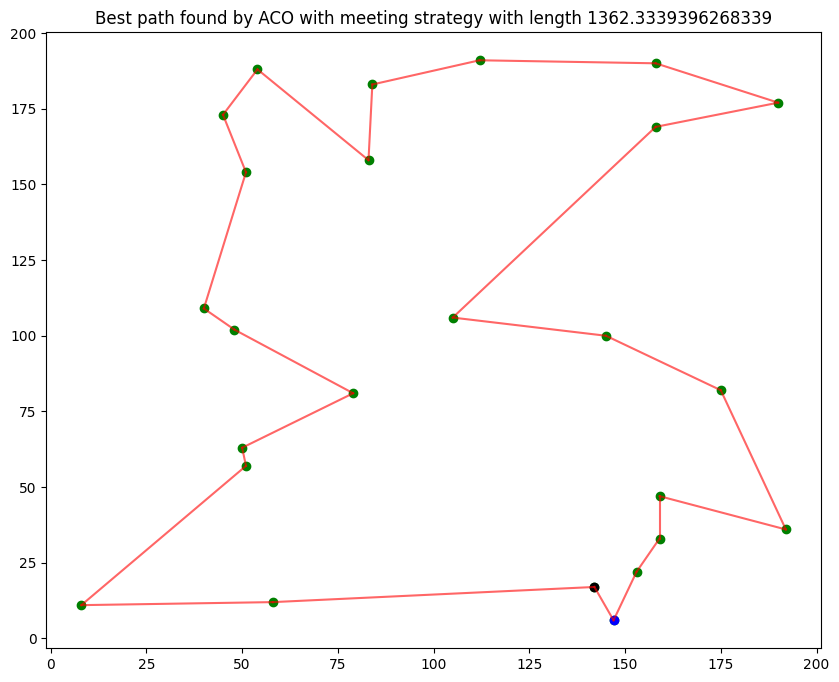

In [26]:
#Cell 9
# Visualizing the best path
plt.figure(figsize=(10, 8))
plt.title(f"Best path found by ACO with meeting strategy with length {best_distance}")
plt.scatter([city.x for city in citylist], [city.y for city in citylist], color='green')
for i in range(len(best_path)):
    start = citylist[best_path[i]]
    end = citylist[best_path[(i + 1) % len(best_path)]]
    plt.plot([start.x, end.x], [start.y, end.y], color='red', alpha=0.6)

#color to starting point
plt.scatter(citylist[best_path[0]].x, citylist[best_path[0]].y, color='blue')
#color to ending point
plt.scatter(citylist[best_path[-1]].x, citylist[best_path[-1]].y, color='black')
plt.scatter
plt.show()

**Helper functions for PSO**

In [21]:
#Cell 10
# Helper functions for PSO
warnings.filterwarnings("ignore", category=RuntimeWarning)

def create_initial_population(num_particles, num_nodes):
    population = []
    for _ in range(num_particles):
        particle = np.random.permutation(num_nodes)
        population.append(particle)
    return population

def calculate_fitness(particle, distance_matrix):
    fitness = 0
    for i in range(len(particle) - 1):
        fitness += distance_matrix[particle[i], particle[i + 1]]
    fitness += distance_matrix[particle[-1], particle[0]]
    return fitness

def update_velocity(particle, velocity, best_personal_position, best_global_position, inertia_weight, cognitive_coeff, social_coeff):
    new_velocity = inertia_weight * velocity
    cognitive_component = cognitive_coeff * np.random.random() * (best_personal_position - particle)
    social_component = social_coeff * np.random.random() * (best_global_position - particle)
    new_velocity += cognitive_component + social_component
    return new_velocity

def apply_velocity(particle, velocity):
    new_particle = particle + velocity
    new_particle = np.mod(new_particle, len(particle))
    new_particle = np.argsort(new_particle)
    return new_particle

**Local search function for PSO (2-opt)**

In [22]:
#Cell 11

def two_opt_local_search(route, distance_matrix, max_iterations=100):
    best_route = route.copy()
    best_distance = calculate_fitness(best_route, distance_matrix)
    improved = True
    iteration = 0

    while improved and iteration < max_iterations:
        improved = False
        for i in range(1, len(route) - 2):
            for j in range(i + 1, len(route)):
                new_route = two_opt_swap(best_route, i, j)
                new_distance = calculate_fitness(new_route, distance_matrix)
                if new_distance < best_distance:
                    best_route = new_route
                    best_distance = new_distance
                    improved = True
        iteration += 1

    return best_route, best_distance

def two_opt_swap(route, i, j):
    new_route = route.copy()
    new_route[i:j+1] = route[j:i-1:-1]
    return new_route

**Hybrid PSO algorithm implementation for TSP**

In [23]:
#Cell 12

def hybrid_pso_tsp(distance_matrix, num_particles, num_iterations, inertia_weight, cognitive_coeff, social_coeff):
    num_nodes = distance_matrix.shape[0]
    population = create_initial_population(num_particles, num_nodes)
    velocities = [np.zeros(num_nodes) for _ in range(num_particles)]

    best_personal_positions = population.copy()
    best_personal_fitnesses = [calculate_fitness(p, distance_matrix) for p in population]
    best_global_position = best_personal_positions[np.argmin(best_personal_fitnesses)]
    best_global_fitness = min(best_personal_fitnesses)

    for iteration in range(num_iterations):
        for i in range(num_particles):
            # Apply PSO update
            velocities[i] = update_velocity(population[i], velocities[i], best_personal_positions[i], best_global_position, inertia_weight, cognitive_coeff, social_coeff)
            population[i] = apply_velocity(population[i], velocities[i])

            # Apply local search
            improved_route, improved_fitness = two_opt_local_search(population[i], distance_matrix)
            population[i] = improved_route

            if improved_fitness < best_personal_fitnesses[i]:
                best_personal_fitnesses[i] = improved_fitness
                best_personal_positions[i] = improved_route
            if improved_fitness < best_global_fitness:
                best_global_fitness = improved_fitness
                best_global_position = improved_route

        print(f"Iteration {iteration + 1}/{num_iterations}, Best path length: {best_global_fitness}")

    return best_global_position, best_global_fitness

**Running the Hybrid PSO algorithm**

In [24]:
#Cell 13
# Running the Hybrid PSO algorithm
best_path, best_path_length = hybrid_pso_tsp(distance_matrix, num_particles, num_iterations, inertia_weight, cognitive_coeff, social_coeff)
print(f"Best path found using Hybrid PSO: {best_path} with length {best_path_length}")

Iteration 1/100, Best path length: 878.352369684302
Iteration 2/100, Best path length: 875.8478300810965
Iteration 3/100, Best path length: 875.8478300810964
Iteration 4/100, Best path length: 875.8478300810964
Iteration 5/100, Best path length: 875.8478300810964
Iteration 6/100, Best path length: 875.8478300810964
Iteration 7/100, Best path length: 875.8478300810964
Iteration 8/100, Best path length: 875.8478300810964
Iteration 9/100, Best path length: 875.8478300810964
Iteration 10/100, Best path length: 875.8478300810964
Iteration 11/100, Best path length: 875.8478300810964
Iteration 12/100, Best path length: 875.8478300810964
Iteration 13/100, Best path length: 875.8478300810964
Iteration 14/100, Best path length: 875.8478300810964
Iteration 15/100, Best path length: 875.8478300810964
Iteration 16/100, Best path length: 875.8478300810964
Iteration 17/100, Best path length: 875.8478300810964
Iteration 18/100, Best path length: 875.8478300810964
Iteration 19/100, Best path length: 87

**Plotting the result for PSO**

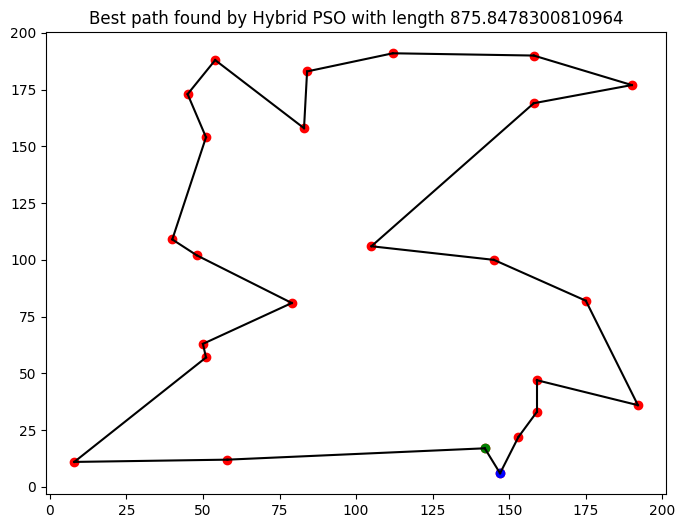

In [25]:
#Cell 14
# Plotting the result
def plot_tsp_path(citylist, path):
    coordinates = [(city.x, city.y) for city in citylist]
    plt.figure(figsize=(8, 6))
    for i in range(len(path)):
        start = coordinates[path[i]]
        end = coordinates[path[(i + 1) % len(path)]]
        plt.plot([start[0], end[0]], [start[1], end[1]], 'black')
    plt.scatter(*zip(*coordinates), color='red')
    #color to starting point
    plt.scatter(*coordinates[path[0]], color='blue')
    #color to ending point
    plt.scatter(*coordinates[path[-1]], color='green')
    plt.title(f"Best path found by Hybrid PSO with length {best_path_length}")
    plt.show()

plot_tsp_path(citylist, best_path)